## Débruitage d'une note de musique

Dans cet exercice, nous allons voir comment débruiter une note de musique à l'aide de la FFT. On va d'abord bruiter une note de musique, puis la débruiter. 

L'idée de cet exercice est de comprendre comment éliminer une fréquence parasite dans un signal. 

Dans la cellule suivante A NE PAS MODIFIER, vous trouverez la note C2 lue, un zoom sur une de ses parties, la note C2 "triplée" (collée 3 fois de suite) et un zoom.

/Users/elo/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:21: WavFileWarning: Chunk (non-data) not understood, skipping it.


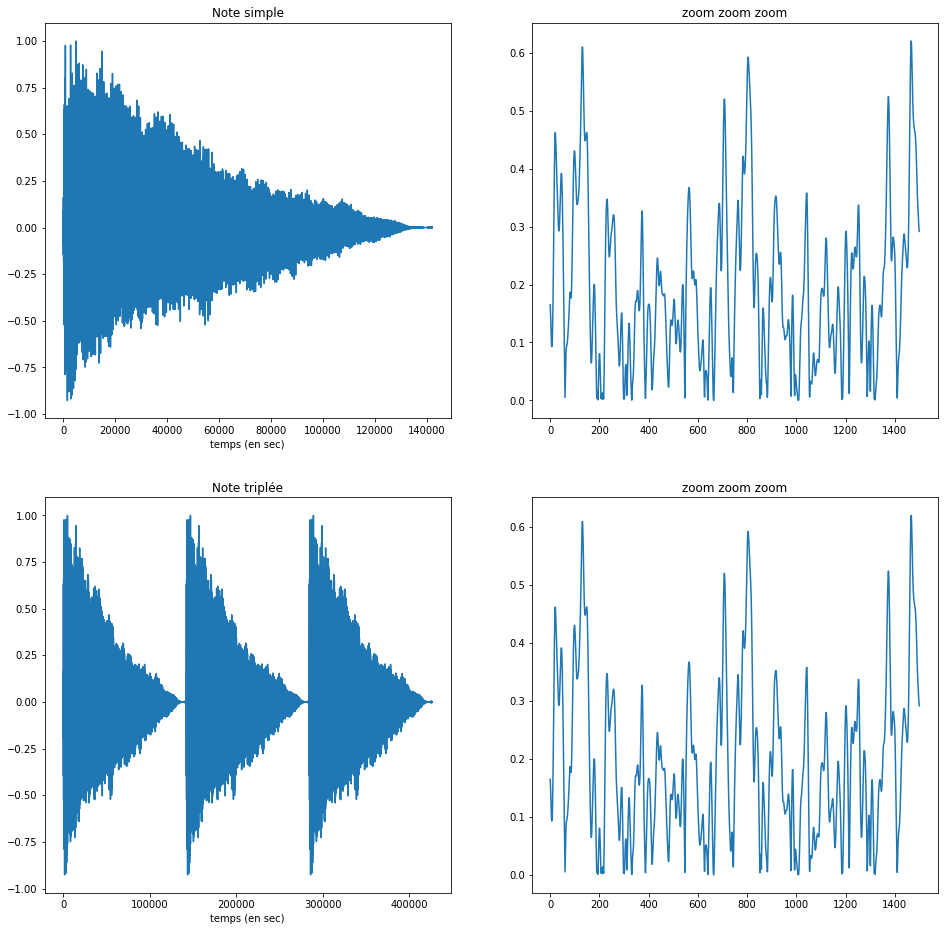

In [1]:
### NE PAS MODIFIER CETTE CELLULE ###

### Les imports ###

import numpy as np
import scipy as sp
from scipy import signal
import skimage as sk
import skimage.io
import matplotlib.pyplot as plt
import scipy.fftpack

# Matplotlib in inline mode
%matplotlib inline

from scipy.io import wavfile
(fs,wav) = sp.io.wavfile.read('signaux/C2.wav')
Te=1/fs
wav = wav[:,0]/wav[:,0].max()
t_wav2=np.arange(0,wav.size)/fs

big_wav = np.concatenate([wav,wav,wav])
t_big_wav = np.arange(0,((wav.size)*3))/fs
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('Note simple')
plt.plot(wav)
plt.xlabel('temps (en sec)')
plt.subplot(222)
plt.title('zoom zoom zoom')
sub_length = 1500
sub_start = int(3.5e4)
plt.plot(np.abs(wav[sub_start:sub_start+sub_length]))
plt.subplot(223)
plt.title('Note triplée')
plt.plot(big_wav)
plt.xlabel('temps (en sec)')
plt.subplot(224)
plt.title('zoom zoom zoom')
sub_length = 1500
sub_start = int(3.5e4)
plt.plot(np.abs(big_wav[sub_start:sub_start+sub_length]))
plt.show()


In [6]:
### et on l'enregistre 
stereo_big_wav = np.vstack((big_wav,big_wav)).T
sp.io.wavfile.write('synthetized_triple_C2.wav',fs,stereo_big_wav)

<font color="blue">**Vérifiez que la note "synthetized_triple_C2.wav" est bien enregistrée dans votre dossier et écoutez-là.**</font>

Tout est bon ? Alors c'est parti ! A vous de jouer ! 


<font color="blue"> **Etape 0 :** Calculez (et affichez) les transformées de fourier de la note "simple" et de la note "triple".  </font>
1) affichez les TF de manière "globale" puis zoomé entre 0 et 3000. 


In [ ]:
X1_signal = # ... A completer

nu = sp.fftpack.fftfreq(wav.size,d=Te)
nu_min = 0
nu_max = 3000
nu_ind = (nu>=nu_min)&(nu<nu_max) # zoom entre 0 et 3000


X3_signal_triple = # ... A completer
nu3 = # ... A completer
nu3_min = 0
nu3_max = 3000
nu3_ind = (nu3>=nu3_min)&(nu3<nu3_max) # zoom entre 0 et 3000


plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('TF note simple globale')
plt.plot(nu,np.abs(X1_signal))
plt.xlabel('fréquences')
plt.subplot(222)
plt.title('TF note simple entre 0 et 3000')
plt.plot(nu[nu_ind], np.abs(X1_signal[nu_ind]))
plt.subplot(223)
plt.title('TF note triple globale')
plt.plot(nu3, np.abs(X3_signal_triple))
plt.xlabel('fréquences')
plt.subplot(224)
plt.title('TF note triple entre 0 et 3000')
plt.plot(nu3[nu3_ind], np.abs(X3_signal_triple[nu3_ind]))
plt.show()

Que remarquez-vous ?

<font color="blue"> **Etape 1 :** bruitez votre signal en rajoutant un sinus de fréquence $\nu_0 = 1000$. </font>


Affichez ce signal comme ci-dessus, et zoomez de la même manière. 

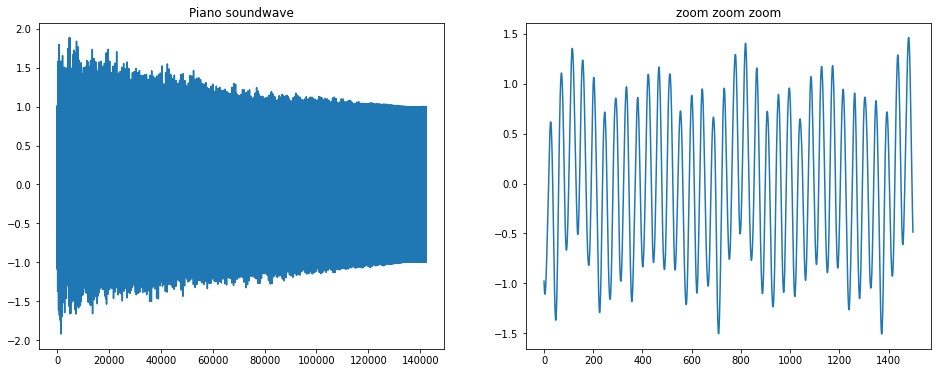

In [10]:
mon_sin = # ... A completer
new_wav = # ... A completer

stereo_nwav = np.vstack((new_wav,new_wav)).T
sp.io.wavfile.write('synthetized_C2_sin.wav',fs,stereo_nwav)


plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Piano soundwave')
plt.plot(new_wav)
plt.subplot(122)
plt.title('zoom zoom zoom')
sub_length = 1500
sub_start = int(3.5e4)
plt.plot(new_wav[sub_start:sub_start+sub_length])
plt.show()

Enregistrez-le et écoutez-le !

C'est pas très agréable hein ? Allons voir ce qu'il se passe de plus près...

<font color="blue"> **Etape 2 :** ***Calculez et affichez*** les transformées de Fourier des 3 signaux suivants : la note, la note bruitée et le sinus.</font>

Histoire de se mettre dans de bonnes dispositions tout de suite,  utilisez fftshift

In [ ]:
# Calcul des TFD
X1_note = # ... A completer
X1_note_bruit = # ... A completer
X1_bruit = # ... A completer

nu = # ... A completer
nu_min = 0
nu_max = 3000
nu_ind = (nu>=nu_min)&(nu<nu_max) # zoom sur la partie centrale des spectre (entre 0 et 80 Hz)

plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('Note')
plt.plot(nu,np.abs(X1_note))
plt.subplot(232)
plt.title('Note avec bruit')
plt.plot(nu,np.abs(X1_note_bruit))
plt.subplot(233)
plt.title('Bruit')
plt.plot(nu,np.abs(X1_bruit))
plt.subplot(234)
plt.title('Note zoom')
plt.plot(nu[nu_ind],np.abs(X1_note)[nu_ind])
plt.subplot(235)
plt.title('Note avec bruit zoom')
plt.plot(nu[nu_ind],np.abs(X1_note_bruit)[nu_ind])
plt.subplot(236)
plt.title('Bruit zoom')
plt.plot(nu[nu_ind],np.abs(X1_bruit)[nu_ind])
plt.show()

Où se situe la différence ? 

 **Affichez maintenant la différence** entre le spectre de la note et celui de la note bruitée pour mieux comprendre.

In [ ]:
difference = # ... A completer
plt.plot(nu,np.abs(difference))

<font color="blue"> **Etape 3 :** Eliminez la fréquence parasite version facile.</font>

Maintenant que vous avez le spectre "parasite", éliminez le !
Affichez le spectre de Fourier après votre élimination, ainsi que la différence entre le spectre "propre" et le spectre "avec élimination".

In [ ]:
nu = # ... A completer
nu_min = 0
nu_max = 3000
nu_ind = (nu>=nu_min)&(nu<nu_max) # zoom sur la partie centrale des spectre (entre 0 et 80 Hz)

sans_bruit = # ... A completer

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(np.abs(sans_bruit[nu_ind]))
plt.subplot(122)
plt.plot(np.abs(X1_note[nu_ind]))
plt.show()

<font color="blue"> **Etape 4 :** Reconstituez le signal "débruité" à partir de son spectre "avec élimination".</font>

Recommencez ce que vous avez fait avant mais SANS le fftshift. Affichez le résultat, enregistrez-le sous forme de .wav et écoutez-le !

In [ ]:
X1_full_note = # ... A completer
X1_bruit_full = # ... A completer



bruit = # ... A completer
sans_bruit = # ... A completer

Note_debruitee = # ... A completer

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title('Note initiale')
plt.plot(wav)
plt.subplot(122)
plt.title('Note reconstruite')
plt.plot(np.real(Note_debruitee))
plt.show()



<font color="blue"> **Etape 5 :** Vous allez avoir un nouvel extrait que nous avons bruité avec un sinus d'une fréquence mystère. Votre mission est la suivante : retrouvez la fréquence du sinus et débruitez l'extrait audio ! </font>

In [130]:
# Lecture de l'extrait video

(fs3,wav3) = sp.io.wavfile.read('signaux/noisy_sncf_mystery.wav')
Te3=1/fs3
wav3 = wav3[:,0]/wav3[:,0].max()
t_wav3=np.arange(0,wav3.size)/fs3

1) Calculez la FFT du signal

In [ ]:
# Calcul de la fft
tf_mystere = # ... A completer
nu_mystere = # ... A completer

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title('Note mystère lue')
plt.plot(wav3)
plt.subplot(122)
plt.title('FFT de la note')
plt.plot(np.abs(tf_mystere)[:3000])
plt.show()

2) Estimez la fréquence du signal parasite en trouvant le plus grand pic dans le signal. <font color="blue"> Quelle est la fréquence du sinus parasite ?</font>

In [145]:
# Retrouver le pic max et sa frequence
maxi = # ... A completer
valeur_freq_bruit = # ... A completer

3) Eliminez le bruit dans la TF 

In [ ]:
# Eliminer la frequence parasite 
## solution : on met à 0 les alentours du pic parasite

mystere_sans_bruit = tf_mystere.copy()
mystere_sans_bruit[# ... A completer]=0



plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('FFT de la note')
plt.plot(np.abs(tf_mystere)[:3000])
plt.subplot(222)
plt.title('FFT sans bruit')
plt.plot(np.abs(mystere_sans_bruit)[:3000])
plt.subplot(223)
plt.title('TF note triple globale')
plt.plot(np.abs(tf_mystere)[-3000:])
plt.subplot(224)
plt.title('TF note triple entre 0 et 3000')
plt.plot(np.abs(mystere_sans_bruit)[-3000:])
plt.show()

4) Reconstituez le signal et enregistrez le avant de l'écouter

In [144]:
mystere_propre = # ... A completer

stereo_mystere = # ... A completer
sp.io.wavfile.write('sncf_debruite.wav',fs3,stereo_mystere)